In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
salaries = pd.read_csv("data/Salaries.csv", low_memory=False)

In [3]:
plt.style.use('fivethirtyeight')

salaries["BasePay"] = pd.to_numeric(salaries["BasePay"], errors="coerce").fillna(0)
salaries["OvertimePay"] = pd.to_numeric(salaries["OvertimePay"], errors="coerce").fillna(0)
salaries["OtherPay"] = pd.to_numeric(salaries["OtherPay"], errors="coerce").fillna(0)
df = salaries[["EmployeeName", "BasePay", "OvertimePay", "OtherPay"]]
df.set_index("EmployeeName", inplace=True)

array([[<AxesSubplot:title={'center':'BasePay'}>,
        <AxesSubplot:title={'center':'OvertimePay'}>],
       [<AxesSubplot:title={'center':'OtherPay'}>, <AxesSubplot:>]],
      dtype=object)

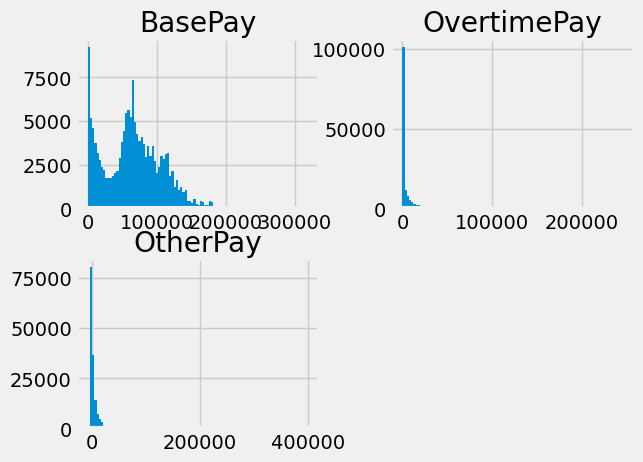

In [4]:
df.hist(bins=100)

<AxesSubplot:>

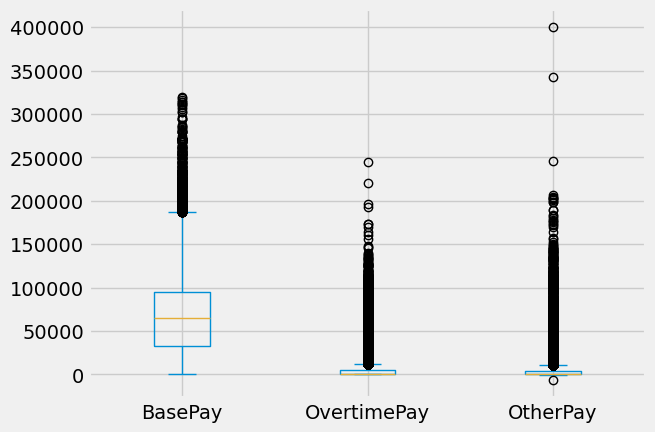

In [5]:
df.plot(kind="box")

In [6]:
houses = pd.read_csv("data/kc_house_data.csv", low_memory=False)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

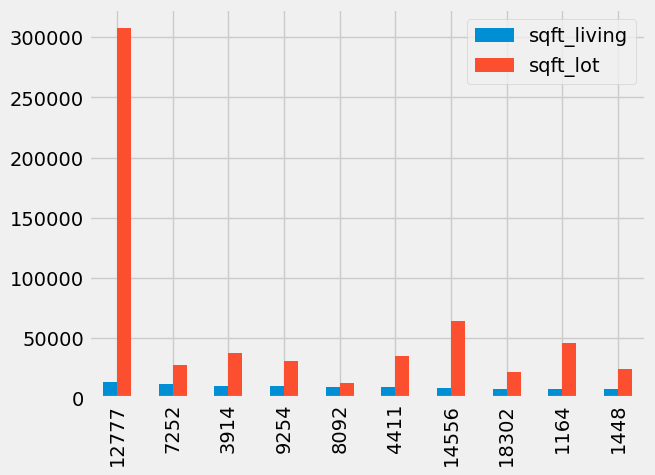

In [7]:
houses[["sqft_living","sqft_lot"]].sort_values("sqft_living",ascending=False).head(10).plot(kind="bar")

<AxesSubplot:>

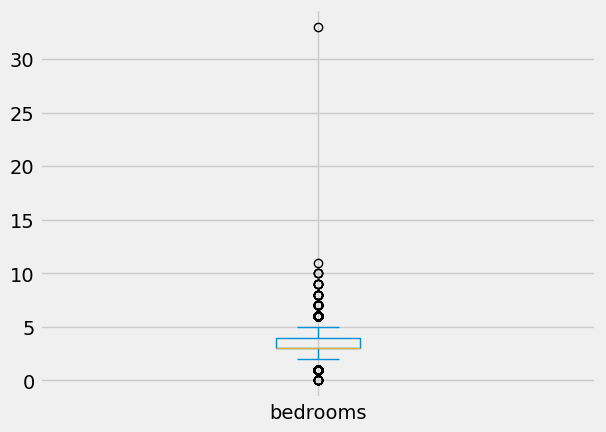

In [8]:
houses["bedrooms"].plot(kind="box")

<AxesSubplot:>

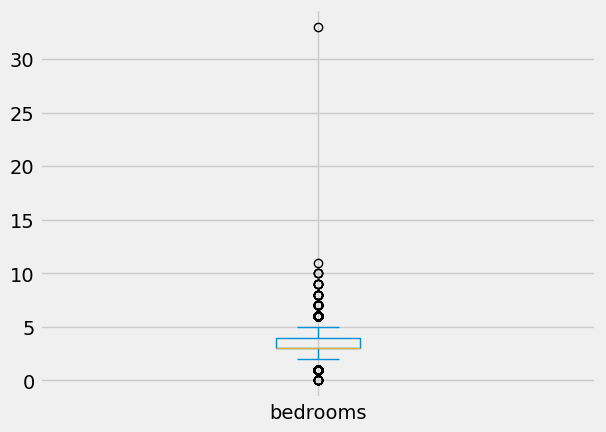

In [9]:
houses.bedrooms.plot(kind="box")
# 다 가능하다.

<AxesSubplot:>

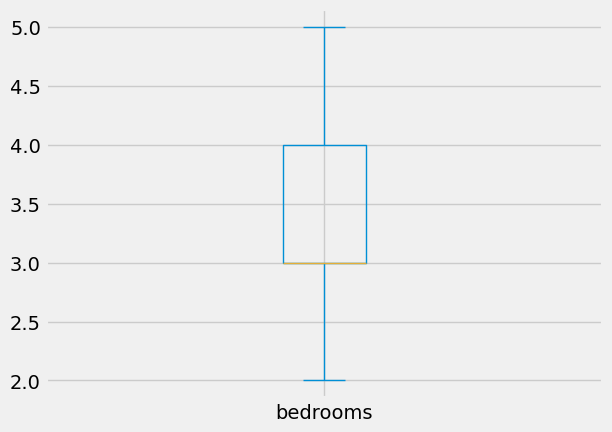

In [10]:
houses.bedrooms.plot(kind="box", showfliers=False)

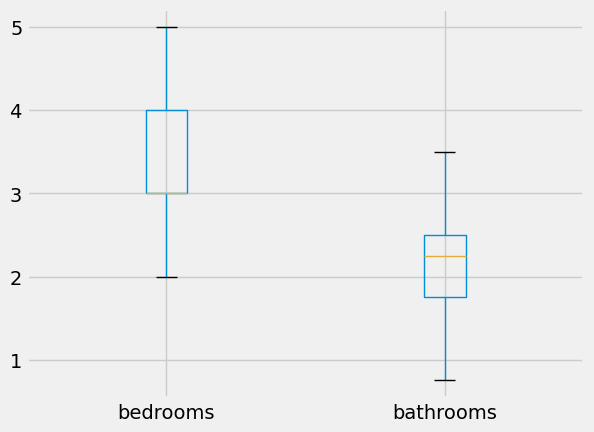

In [11]:
a = houses[["bedrooms","bathrooms"]].boxplot(showfliers=False)
# 이것도 가능하다 boxplot

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

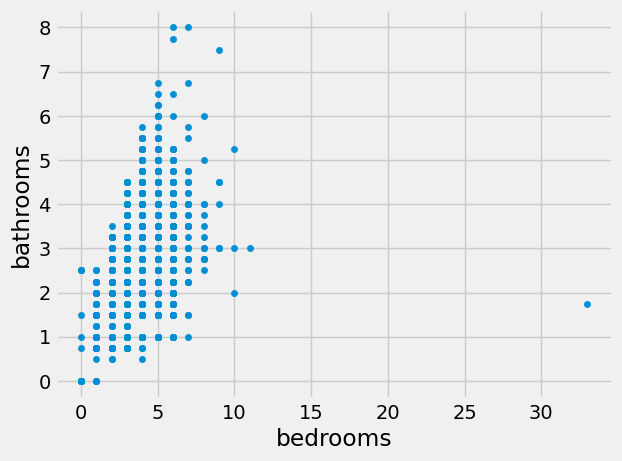

In [12]:
houses.plot.scatter(x="bedrooms", y="bathrooms")

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

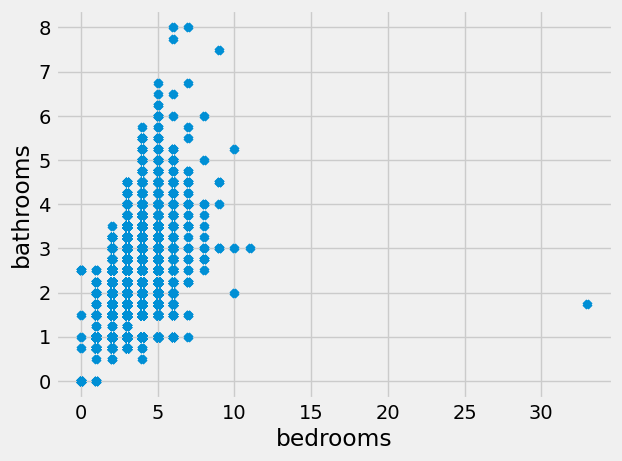

In [13]:
houses.plot.scatter(x="bedrooms", y="bathrooms", marker="x")

In [14]:
ufos = pd.read_csv("data/nuforc_reports.csv", low_memory=False, parse_dates=['date_time',"posted"])

In [15]:
ufos["shape"].value_counts()

light        18230
circle       10130
triangle      7910
fireball      7095
unknown       6182
sphere        6065
other         5749
disk          4522
oval          3857
formation     2842
changing      2112
cigar         1990
flash         1675
rectangle     1597
cylinder      1374
diamond       1273
chevron        953
teardrop       767
egg            666
cone           349
cross          289
Name: shape, dtype: int64

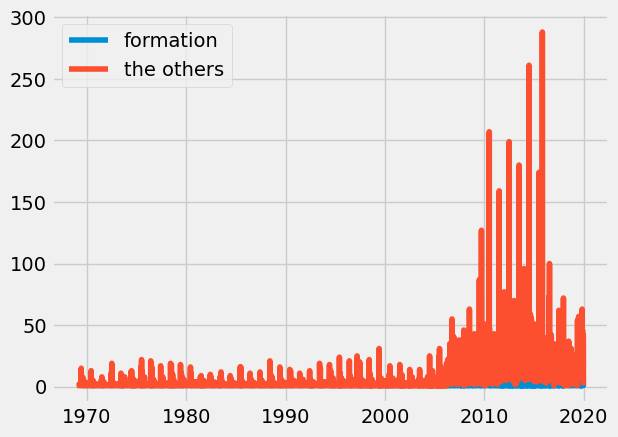

In [16]:
ufos[ufos["shape"]=="formation"].date_time.dt.date.value_counts().sort_index().plot(label="formation")
ufos[ufos["shape"]!="formation"].date_time.dt.date.value_counts().sort_index().plot(label="the others")
plt.legend()

### → ‘date_time’이라는 컬럼을 date형식의 data로 불러 읽어오라는 명령 
### → 위와 같이 컬럼을 date형식으로 처리 하고 난 후에야, date_time.dt 라는 메소드가 잘 작동한다. 

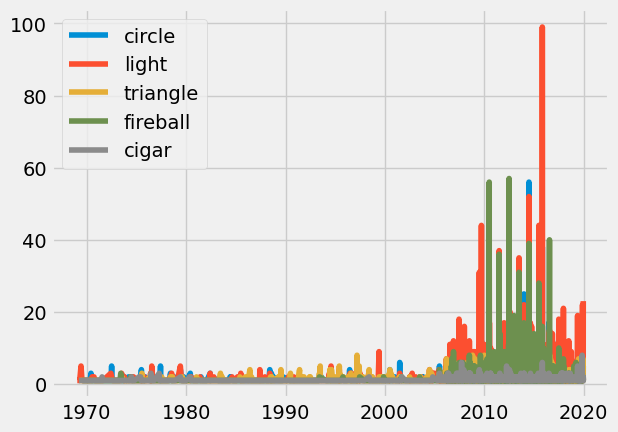

In [17]:
ufos[ufos["shape"]=="circle"].date_time.dt.date.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"]=="light"].date_time.dt.date.value_counts().sort_index().plot(label="light")
ufos[ufos["shape"]=="triangle"].date_time.dt.date.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"]=="fireball"].date_time.dt.date.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"]=="cigar"].date_time.dt.date.value_counts().sort_index().plot(label="cigar")
plt.legend()

(2000.0, 2018.0)

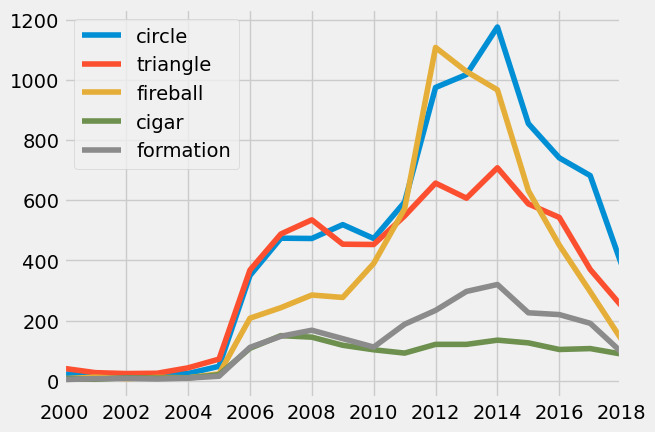

In [41]:
ufos[ufos["shape"]=="circle"].date_time.dt.year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"]=="triangle"].date_time.dt.year.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"]=="fireball"].date_time.dt.year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"]=="cigar"].date_time.dt.year.value_counts().sort_index().plot(label="cigar")
ufos[ufos["shape"]=="formation"].date_time.dt.year.value_counts().sort_index().plot(label="formation")
plt.legend()
plt.xlim(2010,2018)

In [27]:
mon = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

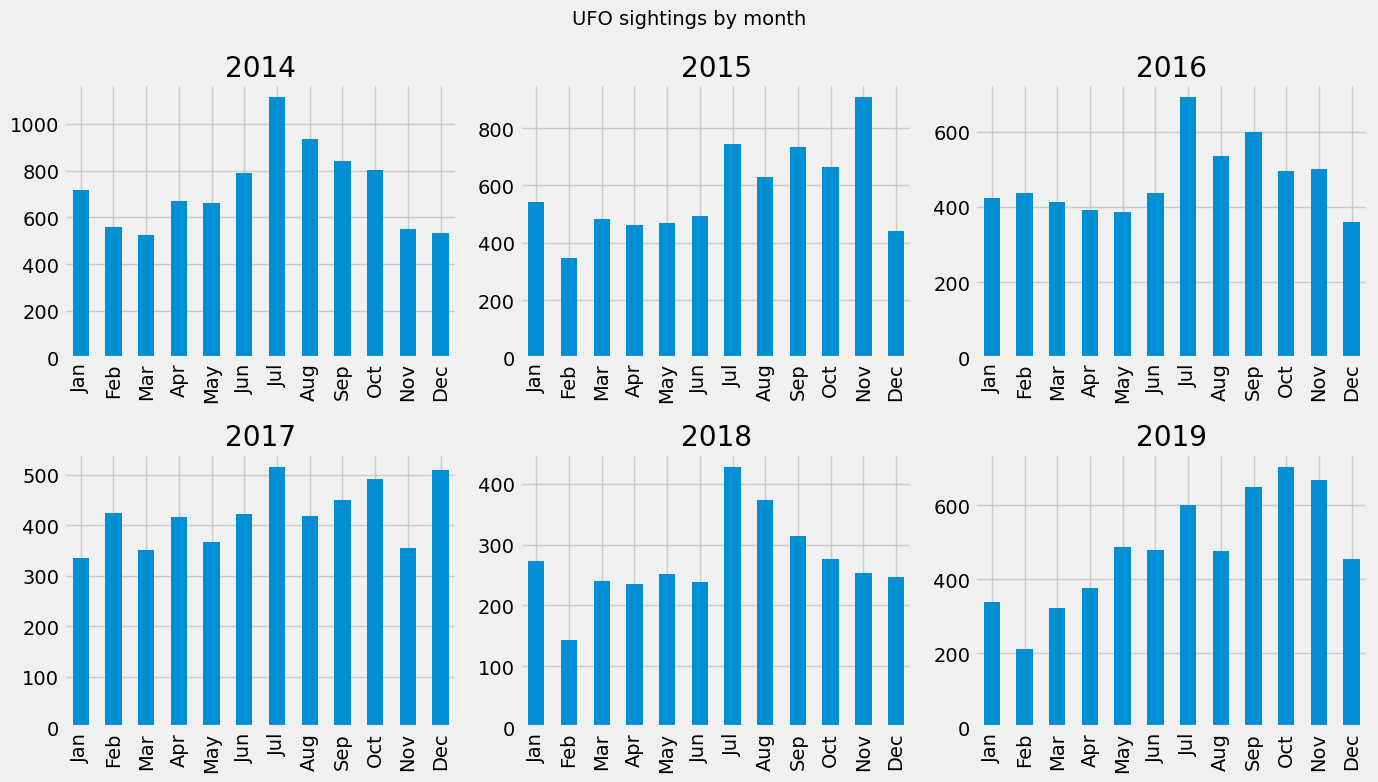

In [39]:
fig,axs=plt.subplots(2,3,figsize=(14,8))
fig.suptitle("UFO sightings by month", fontsize=14)
fig.tight_layout(pad=2)
ufos[ufos.date_time.dt.year==2014].date_time.dt.month.value_counts().sort_index().rename(mon).plot(kind="bar",ax=axs[0][0],title=2014)
ufos[ufos.date_time.dt.year==2015].date_time.dt.month.value_counts().sort_index().rename(mon).plot(kind="bar",ax=axs[0][1],title=2015)
ufos[ufos.date_time.dt.year==2016].date_time.dt.month.value_counts().sort_index().rename(mon).plot(kind="bar",ax=axs[0][2],title=2016)
ufos[ufos.date_time.dt.year==2017].date_time.dt.month.value_counts().sort_index().rename(mon).plot(kind="bar",ax=axs[1][0],title=2017)
ufos[ufos.date_time.dt.year==2018].date_time.dt.month.value_counts().sort_index().rename(mon).plot(kind="bar",ax=axs[1][1],title=2018)
ufos[ufos.date_time.dt.year==2019].date_time.dt.month.value_counts().sort_index().rename(mon).plot(kind="bar",ax=axs[1][2],title=2019)
plt.tight_layout()


(2000.0, 2019.5)

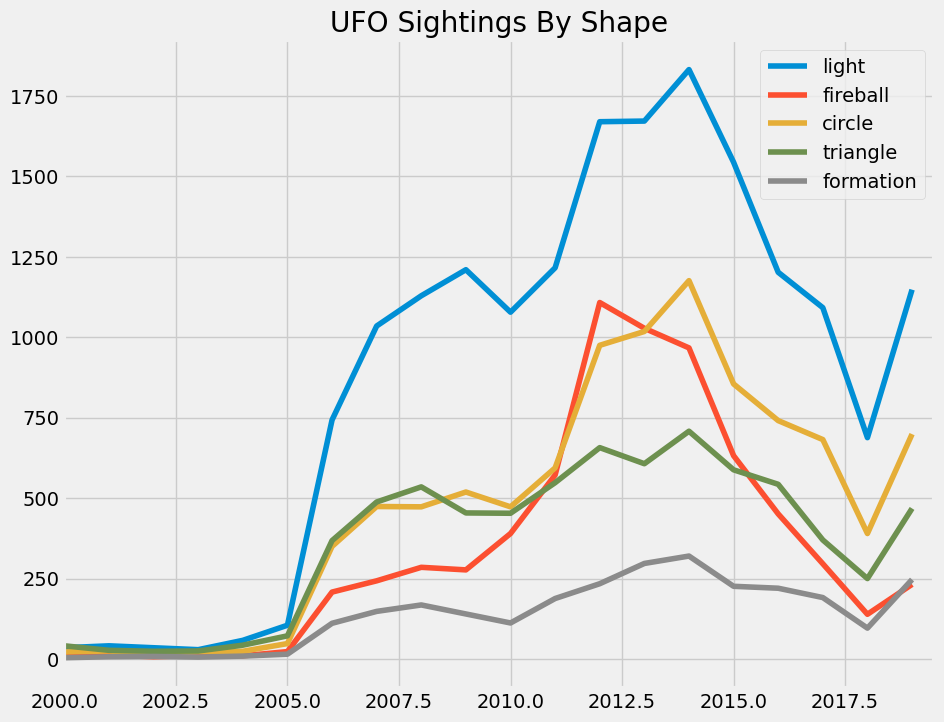

In [49]:
plt.subplots(figsize=(10,8))
plt.title("UFO Sightings By Shape")
ufos[ufos["shape"]=="light"].date_time.dt.year.value_counts().sort_index().plot(label="light")
ufos[ufos["shape"]=="fireball"].date_time.dt.year.value_counts().sort_index().plot(label="fireball")
ufos[ufos["shape"]=="circle"].date_time.dt.year.value_counts().sort_index().plot(label="circle")
ufos[ufos["shape"]=="triangle"].date_time.dt.year.value_counts().sort_index().plot(label="triangle")
ufos[ufos["shape"]=="formation"].date_time.dt.year.value_counts().sort_index().plot(label="formation")
plt.legend()
plt.xlim(2000,2019.5)
#plt.xlim(2000, 2019)
#plt.legend()
#ufos[ufos["shape"] == "light"].year.value_counts().sort_index().plot(label="light", figsize=(10,8), title="UFO Sightings By Shape" )



In [ ]:
}}